## Import libraries 


In [104]:
import pandas as pd #pandas
import seaborn as sns # Data Visualisation
import matplotlib.pyplot as plt # Data Visualisation
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import numpy as np 
from matplotlib.ticker import ScalarFormatter



import requests # To read the parque
import pyarrow.parquet as pq
from io import BytesIO

### Donations Facility

In [2]:
donations_facility_url = 'https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_facility.csv'
donations_facility = pd.read_csv(donations_facility_url)
donations_facility.head(3).T

,0,1,2
date,2006-01-01,2006-01-01,2006-01-01
hospital,Hospital Sultanah Nora Ismail,Hospital Sultanah Aminah,Hospital Sultanah Bahiyah
daily,87,0,208
blood_a,19,0,67
blood_b,20,0,62
blood_o,45,0,61
blood_ab,3,0,18
location_centre,87,0,208
location_mobile,0,0,0
type_wholeblood,87,0,208


In [3]:
# Convert 'date' to datettime format
donations_facility['date'] = pd.to_datetime(donations_facility['date'])

donations_facility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145222 entries, 0 to 145221
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     145222 non-null  datetime64[ns]
 1   hospital                 145222 non-null  object        
 2   daily                    145222 non-null  int64         
 3   blood_a                  145222 non-null  int64         
 4   blood_b                  145222 non-null  int64         
 5   blood_o                  145222 non-null  int64         
 6   blood_ab                 145222 non-null  int64         
 7   location_centre          145222 non-null  int64         
 8   location_mobile          145222 non-null  int64         
 9   type_wholeblood          145222 non-null  int64         
 10  type_apheresis_platelet  145222 non-null  int64         
 11  type_apheresis_plasma    145222 non-null  int64         
 12  type_other      

### Donations State

In [4]:
donations_state_url = 'https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_state.csv'
donations_state = pd.read_csv(donations_state_url)

donations_state.head().T



,0,1,2,3,4
date,2006-01-01,2006-01-02,2006-01-03,2006-01-04,2006-01-05
state,Malaysia,Malaysia,Malaysia,Malaysia,Malaysia
daily,525,227,112,391,582
blood_a,152,53,29,92,149
blood_b,139,43,21,98,198
blood_o,194,112,56,165,193
blood_ab,40,19,6,36,42
location_centre,308,162,112,145,371
location_mobile,217,65,0,246,211
type_wholeblood,525,217,89,371,548


In [5]:
# Convert 'date' columns Dtype to Datetime
donations_state['date'] = pd.to_datetime(donations_state['date'])

# Check Dtype of columns
donations_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92414 entries, 0 to 92413
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     92414 non-null  datetime64[ns]
 1   state                    92414 non-null  object        
 2   daily                    92414 non-null  int64         
 3   blood_a                  92414 non-null  int64         
 4   blood_b                  92414 non-null  int64         
 5   blood_o                  92414 non-null  int64         
 6   blood_ab                 92414 non-null  int64         
 7   location_centre          92414 non-null  int64         
 8   location_mobile          92414 non-null  int64         
 9   type_wholeblood          92414 non-null  int64         
 10  type_apheresis_platelet  92414 non-null  int64         
 11  type_apheresis_plasma    92414 non-null  int64         
 12  type_other               92414 n

## Trend Analysis without State MALAYSIA

In [6]:
# Drop state = 'Malaysia'
donations_state = donations_state.drop(donations_state[donations_state['state'] == 'Malaysia'].index) 

# Groupby the total blood donation by State
donate_by_state = donations_state.groupby('state')['daily'].sum().reset_index() 

# Sort the state in ascending order
donate_by_state = donate_by_state.sort_values(by = 'daily', ascending= True) 
print(donate_by_state)

                state    daily
2            Kelantan   206188
5              Pahang   208108
4     Negeri Sembilan   269916
11         Terengganu   290374
7        Pulau Pinang   394242
10           Selangor   431417
8               Sabah   459014
9             Sarawak   466974
3              Melaka   489299
0               Johor   570988
6               Perak   609725
1               Kedah   778550
12  W.P. Kuala Lumpur  3119324


#### Total Blood Donations by State from 2006 - 2024

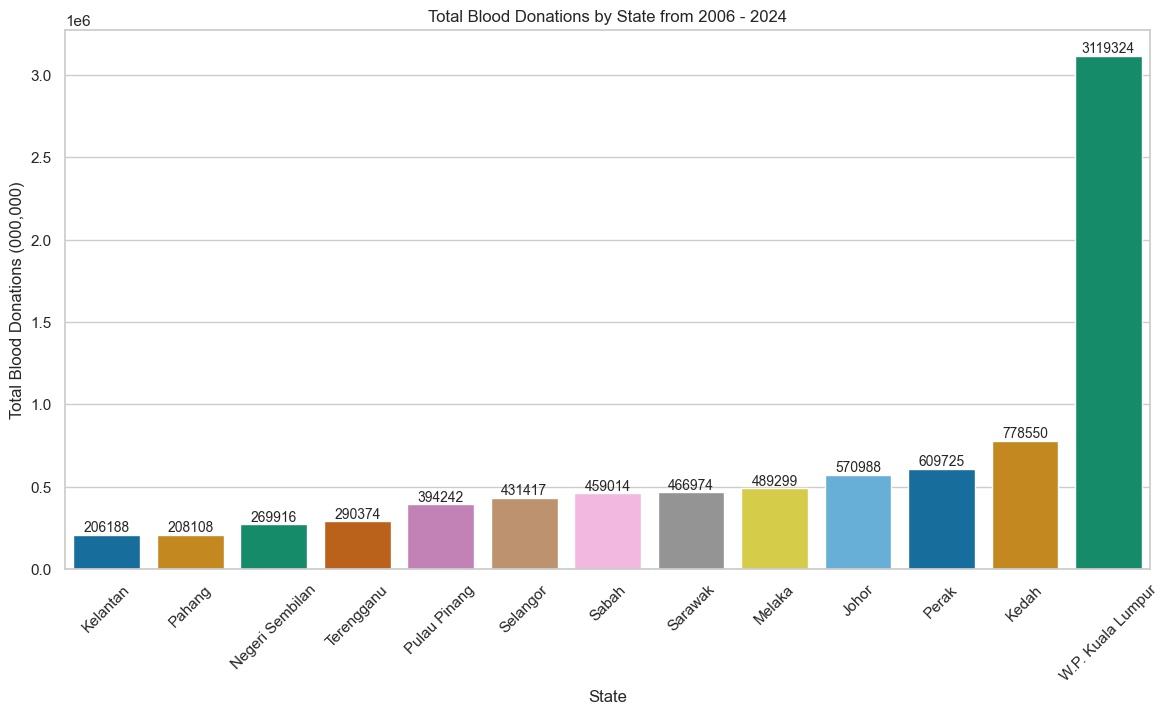

In [7]:
# Chart to show Daily vs state

sns.set(style= "whitegrid")

# Bar plot using seaborn
plt.figure(figsize =(14,7)) # Size of the plot
bar_plot = sns.barplot(x = 'state', y = 'daily', data = donate_by_state, hue = 'state',palette = 'colorblind') # Colour, data for x & y axis, 

plt.title('Total Blood Donations by State from 2006 - 2024')
plt.xlabel('State') 
plt.ylabel('Total Blood Donations (000,000)')
plt.xticks(rotation = 45) # Angle of rotation for x-axis label

# Label value for each State
for index, value in enumerate(donate_by_state['daily']):
    plt.text(index, value + 0.1, f'{value:.0f}', ha = 'center', va = 'bottom', fontsize = 10)

# Save picture
plt.savefig('Total Blood Donations By State.png', dpi = 900,bbox_inches = 'tight')

plt.show()

#### Total Blood Donations trend from 2006 - 2024

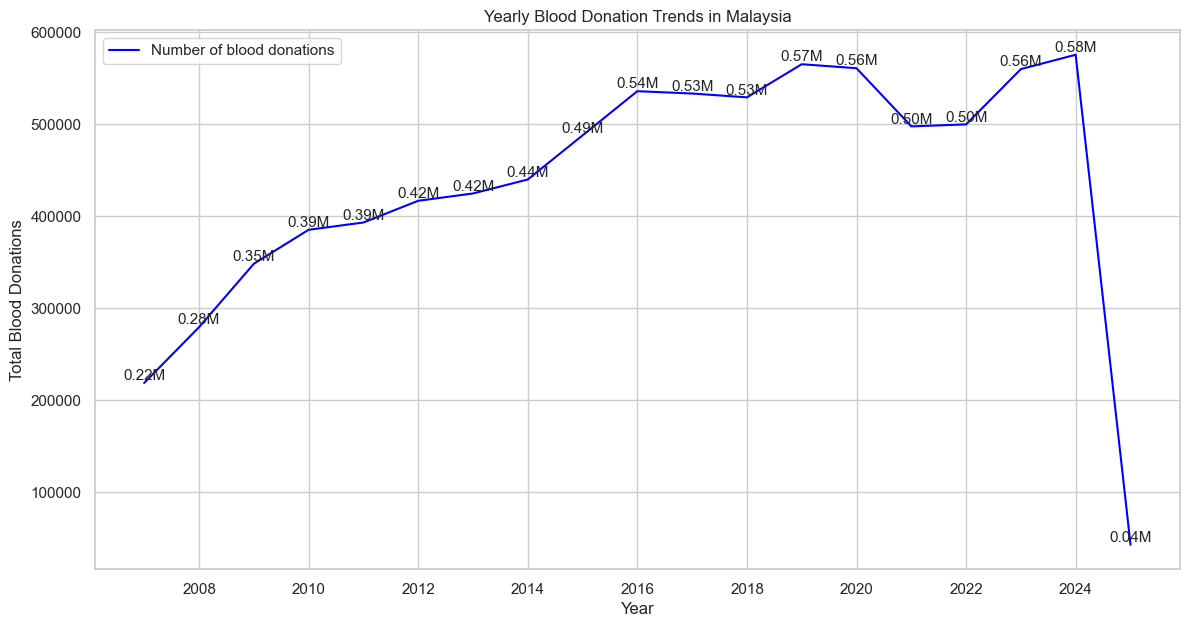

In [8]:
# Calculate sum of daily in year, without using groupby
trydf = donations_state.copy()

# Convert column 'date' to index, which necessary before can apply resample
trydf.set_index('date', inplace = True)

# Resample to year
yearly_donations_state_trydf = trydf.resample('Y').sum()

# Convert back index 'date' to column
yearly_donations_state_trydf = yearly_donations_state_trydf.rename_axis('date').reset_index() # Convert back index 'date' to columns

# Drop column name 'state'
yearly_donations_state_trydf = yearly_donations_state_trydf.drop('state', axis=1) 



#########Yearly trend plot#####################
sns.set(style= "whitegrid")
plt.figure(figsize =(14,7)) # Size of the plot
sns.lineplot(x ='date', y ='daily', data =yearly_donations_state_trydf, color ='blue', label ='Number of blood donations')
plt.title('Yearly Blood Donation Trends in Malaysia') # Title of the plot/chart
plt.xlabel('Year')  # X-axis name
plt.ylabel('Total Blood Donations') # Y-axis name


# Display value of donations for each year in Million(M)
for index, value in enumerate(yearly_donations_state_trydf['daily']):
    plt.text(yearly_donations_state_trydf['date'].iloc[index], value + 0.1, f'{value / 1e6:.2f}M', ha='center', va='bottom', fontsize=11)



### Yearly trend line for each blood type

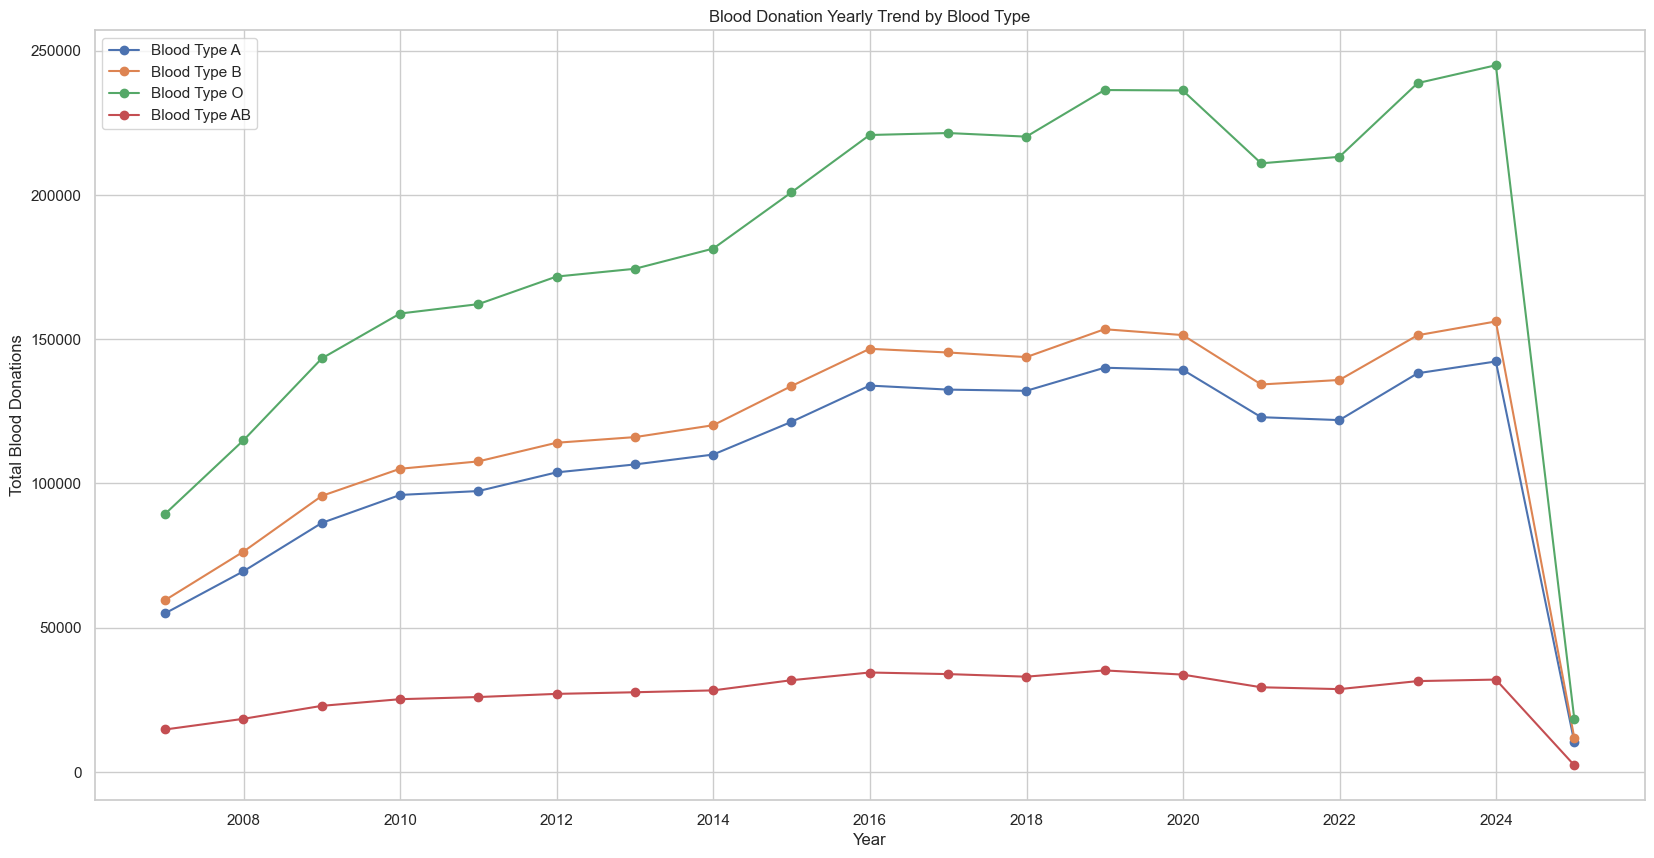

In [9]:
# Plotting the blood donation trend
plt.figure(figsize =(20, 10)) # Size of the plot

# Plot each blood type as a separate line
plt.plot(yearly_donations_state_trydf['date'], yearly_donations_state_trydf['blood_a'], label ='Blood Type A', marker ='o')
plt.plot(yearly_donations_state_trydf['date'], yearly_donations_state_trydf['blood_b'], label ='Blood Type B', marker ='o')
plt.plot(yearly_donations_state_trydf['date'], yearly_donations_state_trydf['blood_o'], label ='Blood Type O', marker ='o')
plt.plot(yearly_donations_state_trydf['date'], yearly_donations_state_trydf['blood_ab'], label ='Blood Type AB', marker ='o')



# Customize the plot
plt.title('Blood Donation Yearly Trend by Blood Type') # Title of the plot
plt.xlabel('Year') # X-axis title
plt.ylabel('Total Blood Donations') # Y-axis title
plt.legend()
plt.grid(True)
plt.show()










In [12]:
# # Group by date and sum daily donations
# daily_donations_state_sum = donations_state.groupby('date')['daily'].sum().reset_index()

# # Set column date as index
# daily_donations_state_sum.set_index('date', inplace = True)

# # Resample to yearly frequency 
# yearly_donations_state = daily_donations_state_sum.resample('Y').sum()
# yearly_donations_state = yearly_donations_state.rename_axis('date').reset_index() # Convert back index 'date' to columns

# # Resample to monthly frequency
# quarter_donations_state = daily_donations_state_sum.resample('Q').sum()
# quarter_donations_state = quarter_donations_state.rename_axis('date').reset_index() # Convert back index 'date' to columns


# yearly_donations_state.head(10)

,date,daily
0,2006-12-31,218892
1,2007-12-31,279378
2,2008-12-31,348367
3,2009-12-31,385280
4,2010-12-31,393163
5,2011-12-31,416751
6,2012-12-31,424726
7,2013-12-31,439907
8,2014-12-31,487806
9,2015-12-31,535822


In [106]:
# # Yearly trend plot
# sns.set(style= "whitegrid")
# plt.figure(figsize =(14,7)) # Size of the plot
# sns.lineplot(x ='date', y ='daily', data =yearly_donations_state, color ='blue', label ='Number of donations')
# plt.title('Blood Donations Yearly Trend')
# plt.xlabel('Year') 
# plt.ylabel('Total Blood Donations (000,000)')


# # Display value of daonations for each year
# for index, value in enumerate(yearly_donations_state['daily']):
#     plt.text(yearly_donations_state['date'].iloc[index], value + 0.1, f'{value / 1e6:.2f}M', ha='center', va='bottom', fontsize=11)

### Newdonors_facility

In [18]:
newdonors_facility_url = 'https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/newdonors_facility.csv'
newdonors_facility = pd.read_csv(newdonors_facility_url)

# Convert Dtype 'date' column to Datetime
newdonors_facility['date'] = pd.to_datetime(newdonors_facility['date'])

newdonors_facility.head(10)

,date,hospital,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Hospital Sultanah Nora Ismail,21,2,2,3,6,1,0,0,1,0,36
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,Hospital Sultanah Bahiyah,0,0,0,1,0,0,0,0,0,0,1
3,2006-01-01,Hospital Raja Perempuan Zainab II,0,0,0,0,0,0,0,0,0,0,0
4,2006-01-01,Hospital Melaka,0,0,0,0,0,0,0,0,0,0,0
5,2006-01-01,Hospital Tuanku Jaafar,0,0,0,0,0,0,0,0,0,0,0
6,2006-01-01,Hospital Tengku Ampuan Afzan,0,0,0,0,0,0,0,0,0,0,0
7,2006-01-01,Hospital Sultan Haji Ahmad Shah,0,0,0,0,0,0,0,0,0,0,0
8,2006-01-01,Hospital Seberang Jaya,0,0,0,0,0,0,0,0,0,0,0
9,2006-01-01,Hospital Pulau Pinang,0,0,0,0,0,0,0,0,0,0,0


In [19]:
newdonors_facility['hospital'].nunique()

22

In [20]:
# Check data type
newdonors_facility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145222 entries, 0 to 145221
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      145222 non-null  datetime64[ns]
 1   hospital  145222 non-null  object        
 2   17-24     145222 non-null  int64         
 3   25-29     145222 non-null  int64         
 4   30-34     145222 non-null  int64         
 5   35-39     145222 non-null  int64         
 6   40-44     145222 non-null  int64         
 7   45-49     145222 non-null  int64         
 8   50-54     145222 non-null  int64         
 9   55-59     145222 non-null  int64         
 10  60-64     145222 non-null  int64         
 11  other     145222 non-null  int64         
 12  total     145222 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 14.4+ MB


### Newdonors_state

In [21]:
newdonors_state_url = 'https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/newdonors_state.csv'
newdonors_state = pd.read_csv(newdonors_state_url)
newdonors_state.head(10)

,date,state,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Malaysia,124,31,31,18,24,7,5,2,1,0,243
1,2006-01-02,Malaysia,16,15,11,8,19,6,6,2,0,0,83
2,2006-01-03,Malaysia,1,2,1,2,1,0,0,1,0,0,8
3,2006-01-04,Malaysia,171,35,27,13,16,16,6,1,0,1,286
4,2006-01-05,Malaysia,219,41,22,13,16,8,8,1,0,0,328
5,2006-01-06,Malaysia,130,11,9,4,7,1,0,0,0,0,162
6,2006-01-07,Malaysia,17,13,11,3,7,2,0,0,0,0,53
7,2006-01-08,Malaysia,214,43,30,40,23,11,7,0,0,0,368
8,2006-01-09,Malaysia,222,11,6,6,2,1,1,0,0,0,249
9,2006-01-10,Malaysia,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Convert Dtype 'date' column to Datetime
newdonors_state['date'] = pd.to_datetime(newdonors_state['date'])

# Check Dtype of columns
newdonors_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92414 entries, 0 to 92413
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    92414 non-null  datetime64[ns]
 1   state   92414 non-null  object        
 2   17-24   92414 non-null  int64         
 3   25-29   92414 non-null  int64         
 4   30-34   92414 non-null  int64         
 5   35-39   92414 non-null  int64         
 6   40-44   92414 non-null  int64         
 7   45-49   92414 non-null  int64         
 8   50-54   92414 non-null  int64         
 9   55-59   92414 non-null  int64         
 10  60-64   92414 non-null  int64         
 11  other   92414 non-null  int64         
 12  total   92414 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 9.2+ MB


In [23]:
# Filter column 'state' to include Malaysia only
newdonors_state_malaysia = newdonors_state[ newdonors_state['state'] == 'Malaysia']
newdonors_state_malaysia.head()

,date,state,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Malaysia,124,31,31,18,24,7,5,2,1,0,243
1,2006-01-02,Malaysia,16,15,11,8,19,6,6,2,0,0,83
2,2006-01-03,Malaysia,1,2,1,2,1,0,0,1,0,0,8
3,2006-01-04,Malaysia,171,35,27,13,16,16,6,1,0,1,286
4,2006-01-05,Malaysia,219,41,22,13,16,8,8,1,0,0,328


In [24]:
# Set column date as index(need to do this before resample can be done)
newdonors_state_malaysia.set_index('date', inplace = True)

In [25]:
# Resample date to yearly
newdonors_state_malaysia = newdonors_state_malaysia.resample('Y').sum()
newdonors_state_malaysia = newdonors_state_malaysia.rename_axis('date').reset_index() # Convert back index 'date' to columns

# Drop column 'state'
newdonors_state_malaysia = newdonors_state_malaysia.drop('state', axis=1) 




In [52]:
# Convert value inside columns age to %(percentage)
age_group_columns = ['17-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', 'other']
df_percentage = [newdonors_state_malaysia[age_group_columns].div(newdonors_state_malaysia['total'], axis = 0)*100] # Take the value exist inside column age and divide with 'Total' , then multiply with 100. To get the percentage

# Convert the list to pandas dataframe
df_percentage = pd.concat(df_percentage)

# Round off to 2 decimal places of %(percentage)
df_percentage = df_percentage.round(2)

# Add column 'date' to the df_percentage
df_percentage = pd.concat([newdonors_state_malaysia['date'].dt.year, df_percentage], axis = 1)

# Rename column 'date' to 'year'

df_percentage.rename(columns = {'date':'Year'}, inplace = True) 

df_percentage


,Year,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other
0,2006,49.22,16.30,10.91,8.74,6.77,4.67,2.40,0.83,0.05,0.11
1,2007,47.16,16.60,11.30,9.18,7.03,4.90,2.61,0.95,0.09,0.19
2,2008,48.36,15.77,11.12,9.06,6.93,4.90,2.65,0.98,0.08,0.15
3,2009,48.19,16.56,11.38,8.80,6.65,4.73,2.53,0.94,0.08,0.15
4,2010,49.70,16.03,11.40,8.59,6.41,4.36,2.31,0.86,0.09,0.26
5,2011,52.34,15.50,10.55,7.93,6.01,4.10,2.38,0.94,0.07,0.19
6,2012,51.53,15.13,11.05,8.06,6.15,4.21,2.58,1.03,0.09,0.18
7,2013,51.18,15.20,11.29,8.29,6.10,4.16,2.55,1.04,0.09,0.12
8,2014,48.85,14.53,11.82,9.14,6.75,4.64,2.83,1.20,0.12,0.11
9,2015,48.82,14.59,12.08,9.17,6.59,4.61,2.74,1.21,0.12,0.08


In [54]:
# Set 'Year' column as index
df_percentage.set_index('Year', inplace = True)


## Heatmap Age range

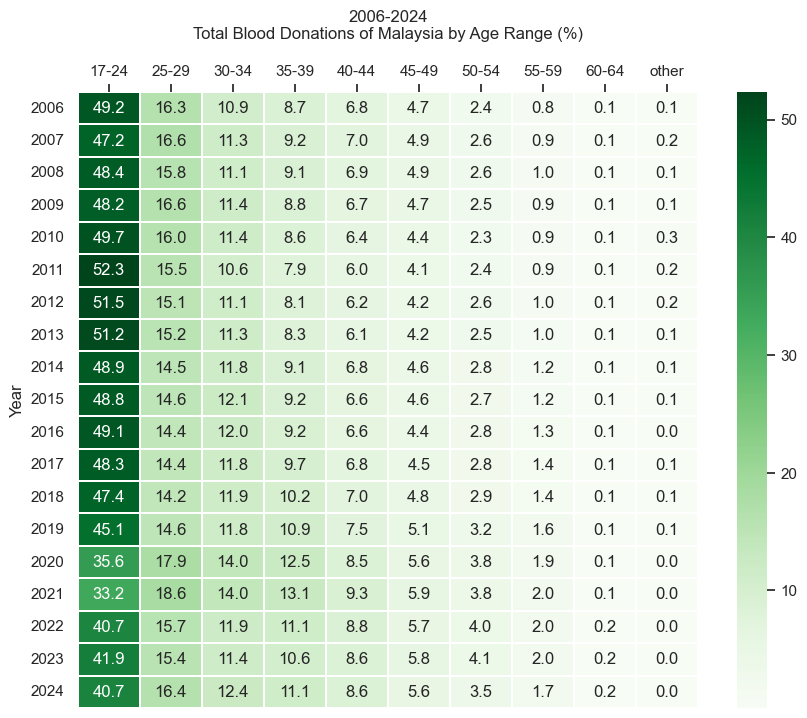

In [56]:
# Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df_percentage, cmap='Greens', annot=True, fmt=".1f", linewidths=.1)
plt.title('2006-2024\nTotal Blood Donations of Malaysia by Age Range (%)\n') # Plot title

# Move X-axis to the top
plt.gca().xaxis.tick_top()

# # Save as image
# df_percentage_image = 'Percentage_Blood_Donations_By_Age_Range.png'
# plt.savefig(df_percentage_image, bbox_inches = 'tight')
# plt.close()

# 6789524159:AAHIbYINLbnswT2iciqWCIQbt75uZsKSTTg


### Granular / Parque file

In [63]:

donor_url = "https://dub.sh/ds-data-granular"

# Download the Parquet file
response = requests.get(donor_url)
parquet_data = BytesIO(response.content)

# Read the Parquet file into a pandas DataFrame
table = pq.read_table(parquet_data)
donor_df = table.to_pandas()

# Convert dtype column 'visit_date' to datetime
donor_df['visit_date'] = pd.to_datetime(donor_df['visit_date'])

donor_df.head(7)




,donor_id,visit_date,birth_date
0,00000,2013-11-03,1964
1,00000,2014-05-26,1964
2,00000,2015-01-25,1964
3,00000,2015-08-09,1964
4,00000,2016-03-10,1964
5,00000,2016-08-14,1964
6,00000,2016-12-19,1964


In [64]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252287 entries, 0 to 6252286
Data columns (total 3 columns):
 #   Column      Dtype         
---  ------      -----         
 0   donor_id    object        
 1   visit_date  datetime64[ns]
 2   birth_date  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 143.1+ MB


In [78]:
# Check time difference between consecutive visits for each donor
aa = donor_df.copy()
aa.sort_values(['donor_id','visit_date'], inplace= True)
aa['Day_Between_Visit'] = aa.groupby('donor_id')['visit_date'].diff().dt.days

aa.head()

,donor_id,visit_date,birth_date,Day_Between_Visit
0,00000,2013-11-03,1964,NaN
1,00000,2014-05-26,1964,204.0
2,00000,2015-01-25,1964,244.0
3,00000,2015-08-09,1964,196.0
4,00000,2016-03-10,1964,214.0


In [90]:
# Check number of donor that donate more than 1 time
returning_donors = aa[aa['Day_Between_Visit'].notnull()]

returning_donors['donor_id'].nunique()



1076796

In [91]:
average_time_between_visits = aa['Day_Between_Visit'].mean()
average_time_between_visits

425.44092773547936

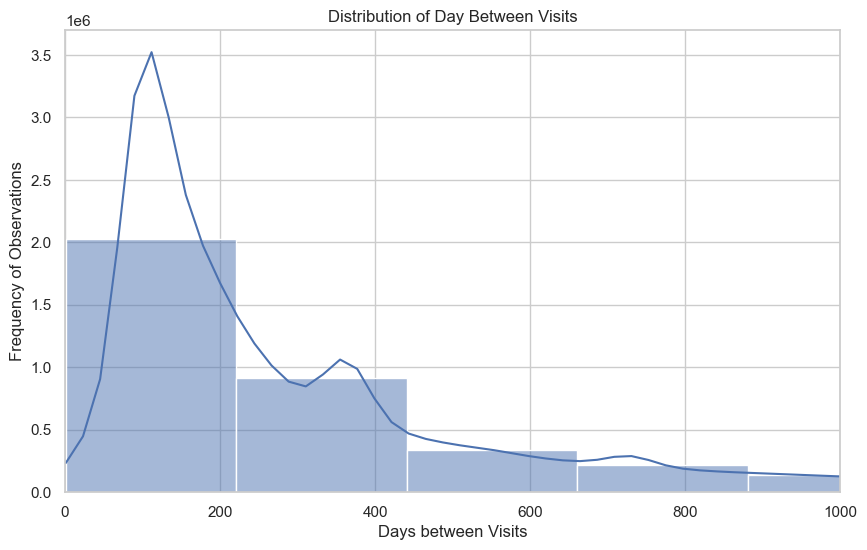

In [105]:
# Distribution
plt.figure(figsize= (10,6))
histogram =sns.histplot(data= returning_donors, x='Day_Between_Visit', bins=20, kde= True)
plt.title("Distribution of Day Between Visits")
plt.xlabel('Days between Visits')
plt.ylabel('Frequency of Observations')

# Set x-axis limits
plt.xlim(0, 1000)
plt.show()

In [74]:
id_count = aa['donor_id'].value_counts()

# Find ID with maximum counts
max_count_id = id_count.idxmax()
print(f"The ID with the maximum count is: {max_count_id}")


The ID with the maximum count is: 02eRf


In [73]:
id_count = df['donor_id'].value_counts()

# Find ID with maximum counts
max_count_id = id_count.idxmax()

print(f"The ID with the maximum count is: {max_count_id}")


The ID with the maximum count is: 02eRd


### Donor  Facility

In [107]:
# donors_facility  = 'https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/newdonors_facility.csv'
# donors_facility = pd.read_csv(donors_facility)
# donors_facility.head()